In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from pandas.api.types import is_numeric_dtype
from pandas.plotting import scatter_matrix
from pandas import Series

In [3]:
file = "Laptop_price.csv"

Prepare data

In [4]:
train = pd.read_csv(file)
df = pd.DataFrame(train)
df_no_brand = pd.DataFrame(train).drop(['Brand'], axis=1)
print(df.shape)
print(df.dtypes)
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("Numeric:", numeric_cols)
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("No numeric:", non_numeric_cols)

(1000, 7)
Brand                object
Processor_Speed     float64
RAM_Size              int64
Storage_Capacity      int64
Screen_Size         float64
Weight              float64
Price               float64
dtype: object
Numeric: ['Processor_Speed' 'RAM_Size' 'Storage_Capacity' 'Screen_Size' 'Weight'
 'Price']
No numeric: ['Brand']


Brand - 0%
Processor_Speed - 0%
RAM_Size - 0%
Storage_Capacity - 0%
Screen_Size - 0%
Weight - 0%
Price - 0%


<Axes: >

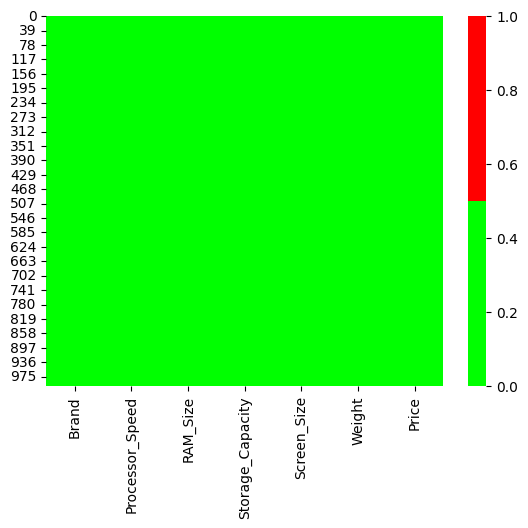

In [5]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
colours = ['#00ff00', '#ff0000'] 
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))

Create missing column

<Axes: title={'center': 'Miss'}, ylabel='Frequency'>

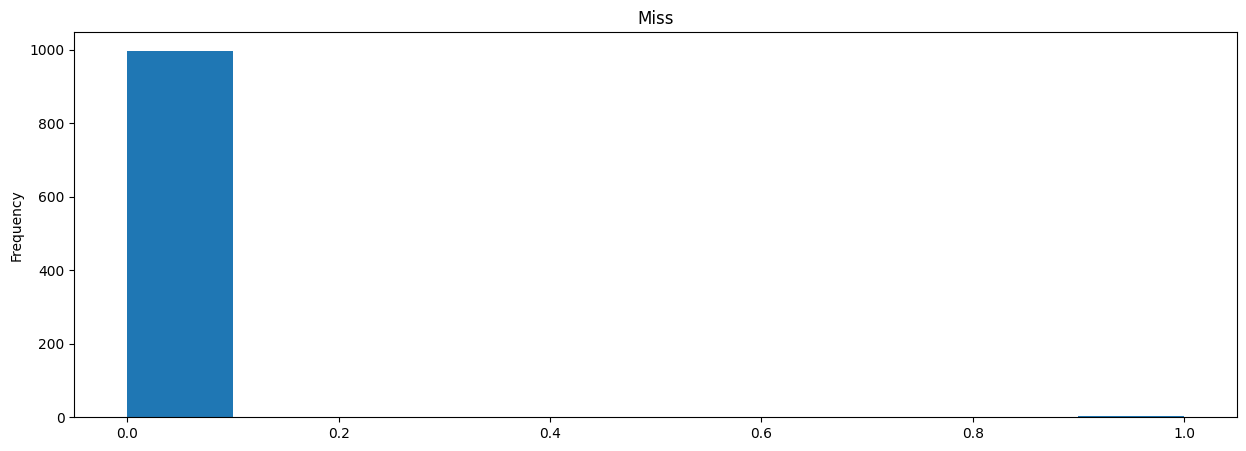

In [6]:
from pandas import DataFrame

mdf = DataFrame()
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        mdf['{}_ismissing'.format(col)] = missing


ismissing_cols = [col for col in mdf.columns if 'ismissing' in col]
mdf['num_missing'] = mdf[ismissing_cols].sum(axis=1)

mdf['num_missing'].plot(kind='hist', figsize=(15,5), title="Miss")

show all

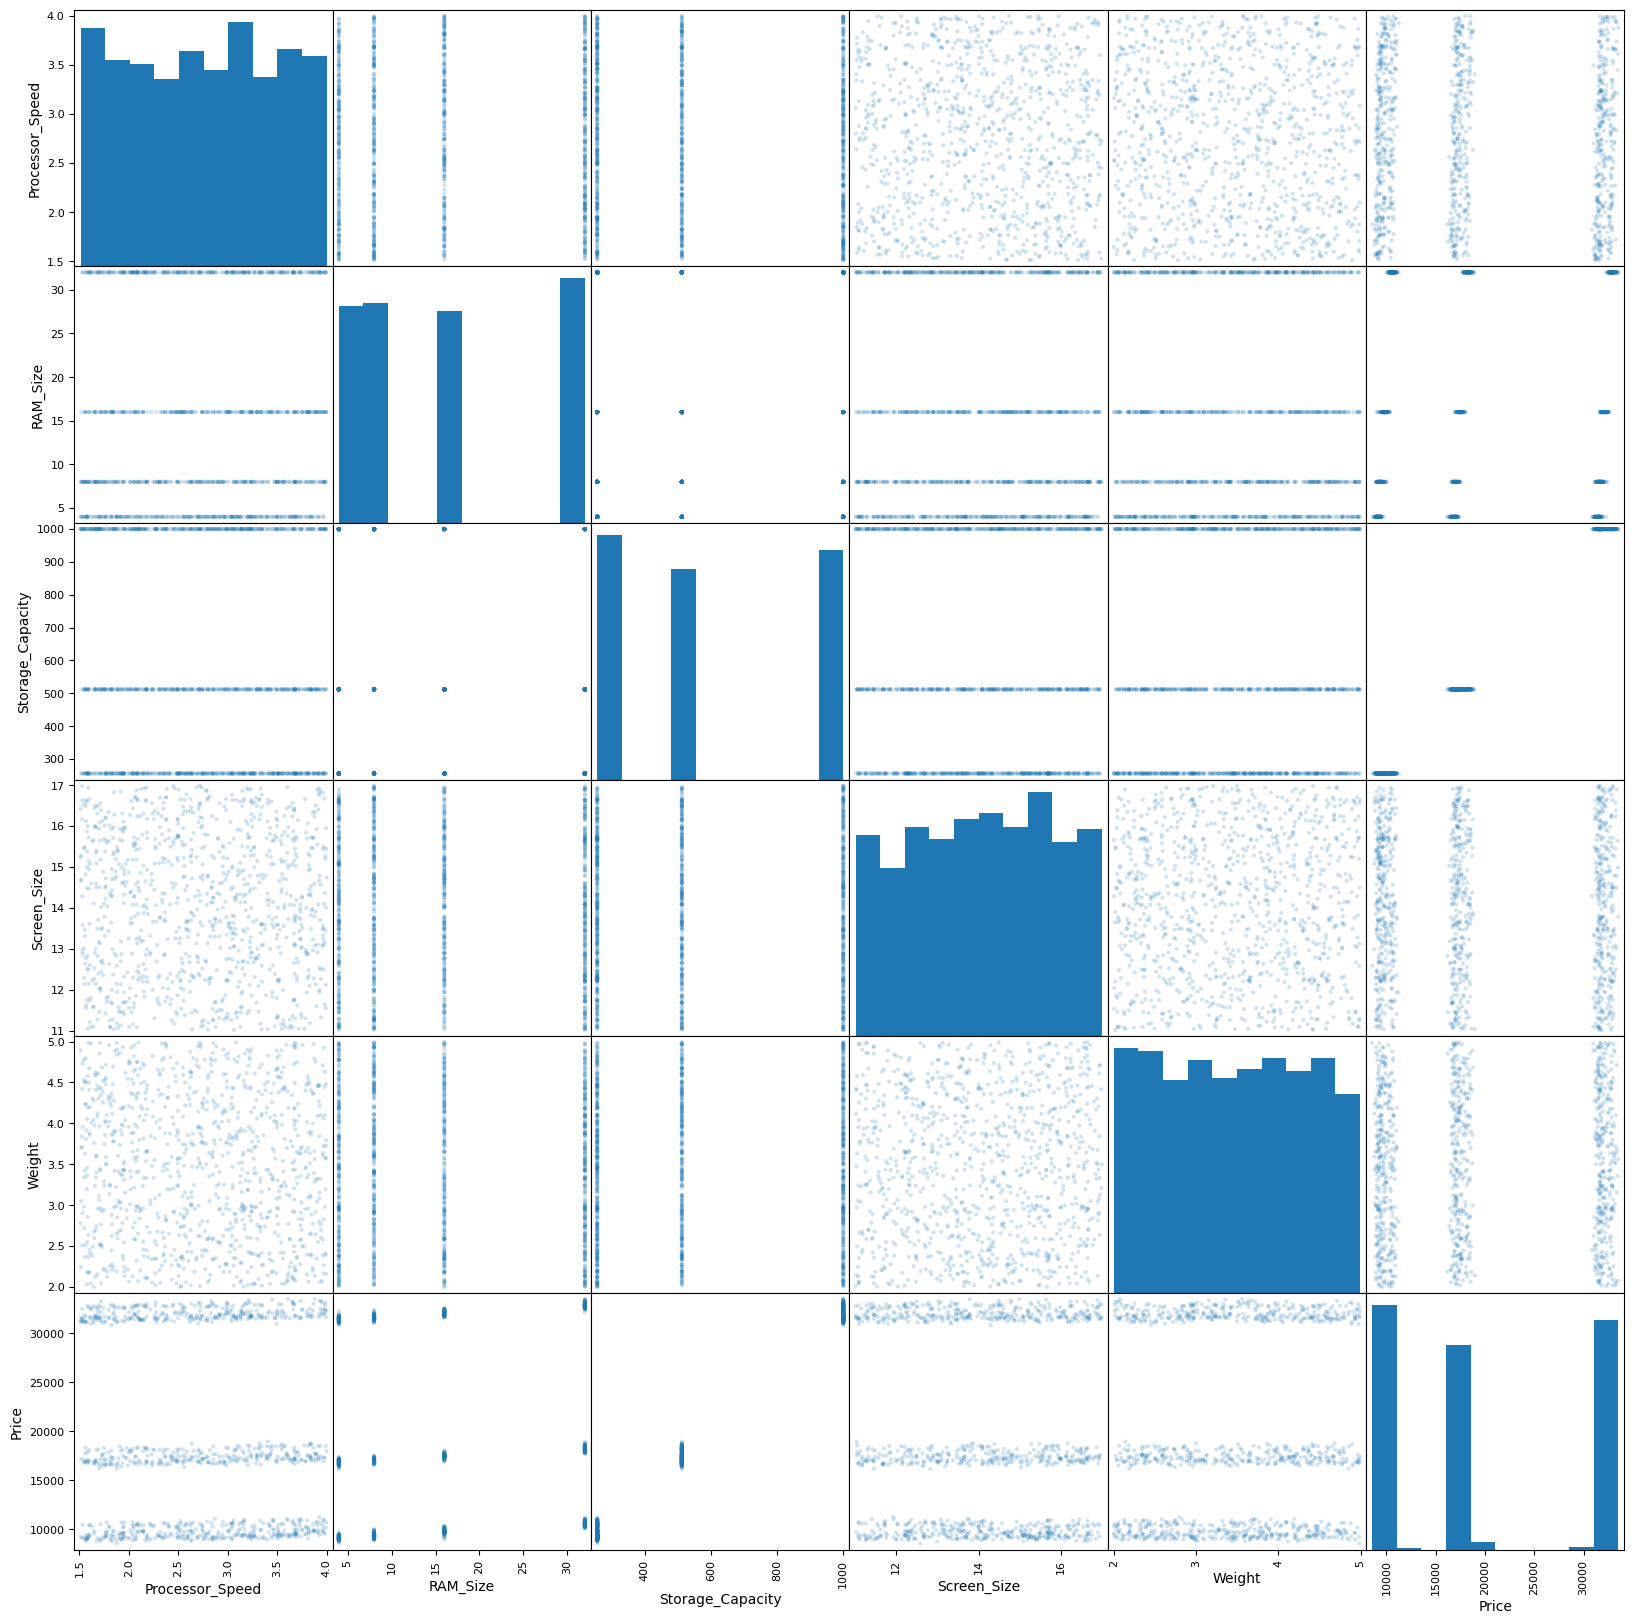

In [7]:
scatter_matrix(df, alpha=0.2, figsize=(20, 20), diagonal="hist");

show intresting

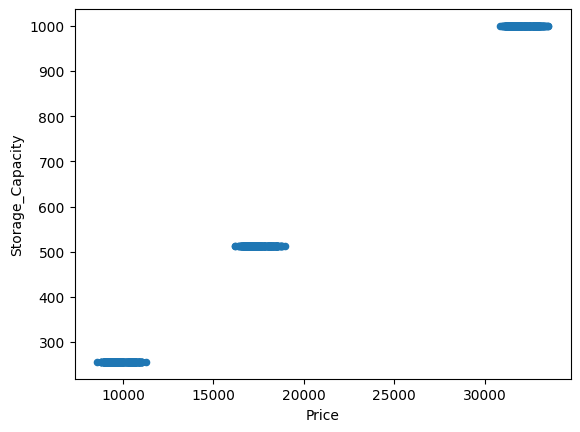

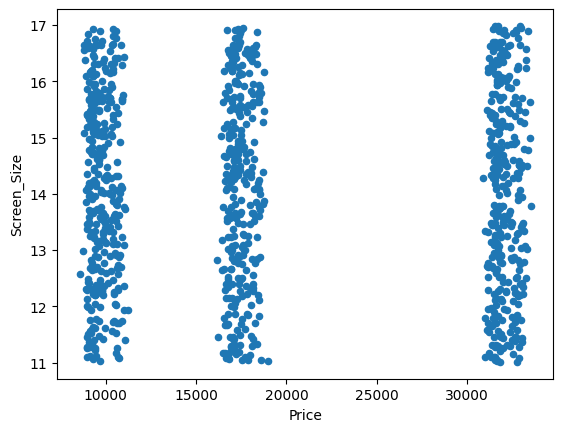

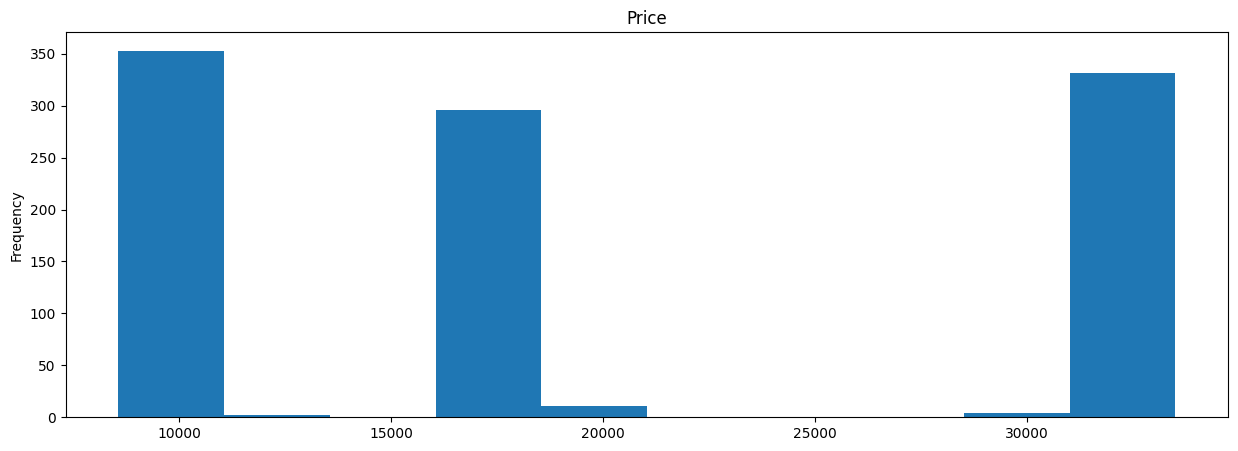

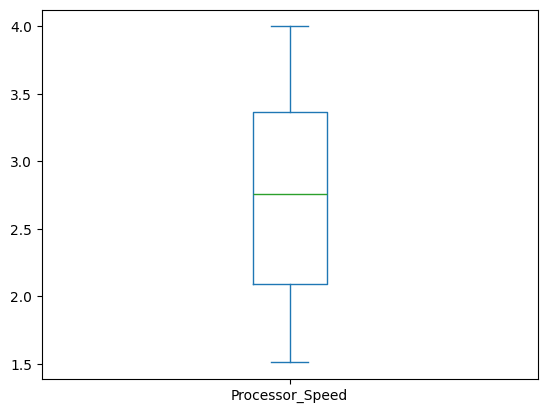

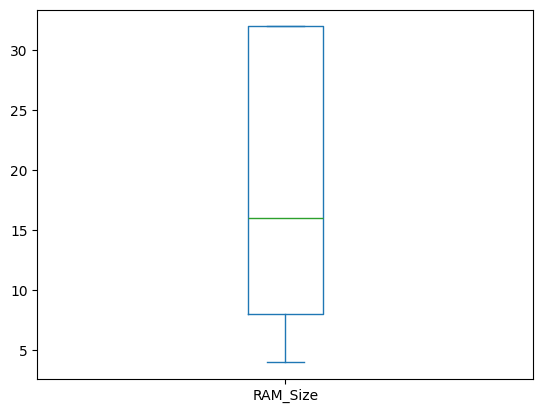

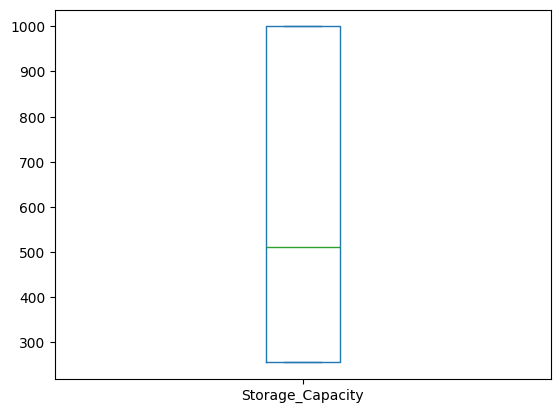

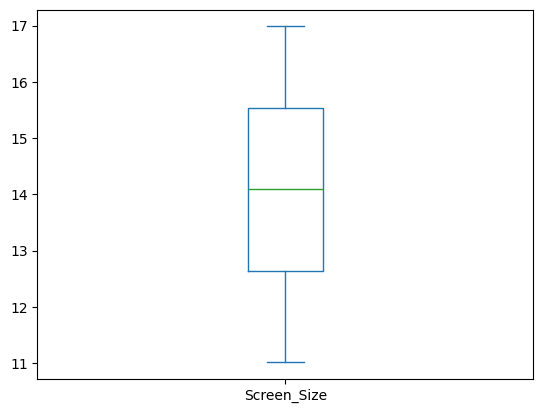

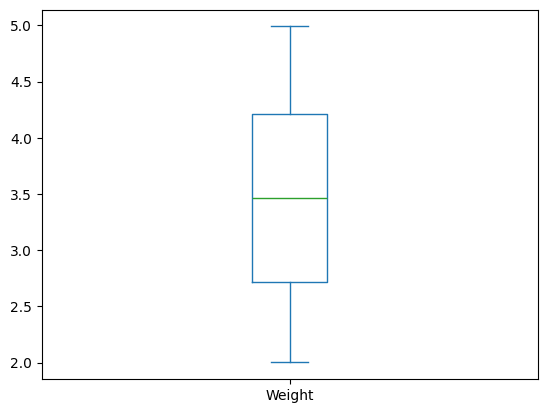

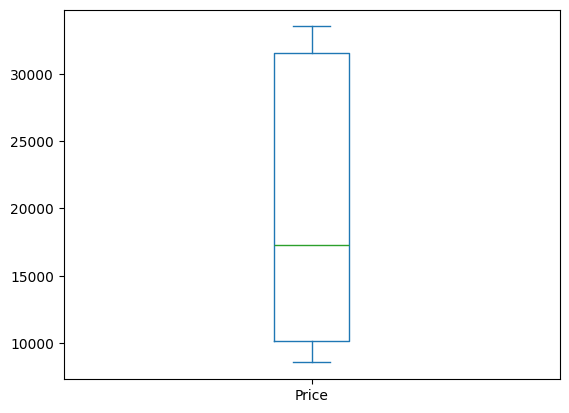

In [8]:
df.plot.scatter(x= "Price", y= "Storage_Capacity")
plt.show()
df.plot.scatter(x= "Price", y= "Screen_Size")
plt.show()
ts = Series(df["Price"])
ts.plot(kind='hist', figsize=(15,5), title="Price")
plt.show()

for col in df:
 if is_numeric_dtype(df[col].dtype):
  df[col].plot.box(return_type='both')
  plt.show()

show correlation heatmap

                  Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size  \
Processor_Speed          1.000000  0.021391         -0.067576    -0.013425   
RAM_Size                 0.021391  1.000000          0.002111    -0.036002   
Storage_Capacity        -0.067576  0.002111          1.000000    -0.027560   
Screen_Size             -0.013425 -0.036002         -0.027560     1.000000   
Weight                  -0.054603 -0.025382          0.041335     0.021995   
Price                   -0.052451  0.058234          0.997905    -0.030380   

                    Weight     Price  
Processor_Speed  -0.054603 -0.052451  
RAM_Size         -0.025382  0.058234  
Storage_Capacity  0.041335  0.997905  
Screen_Size       0.021995 -0.030380  
Weight            1.000000  0.037298  
Price             0.037298  1.000000  
                  Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size  \
Processor_Speed               NaN  0.021391         -0.067576    -0.013425   
RAM_Size                

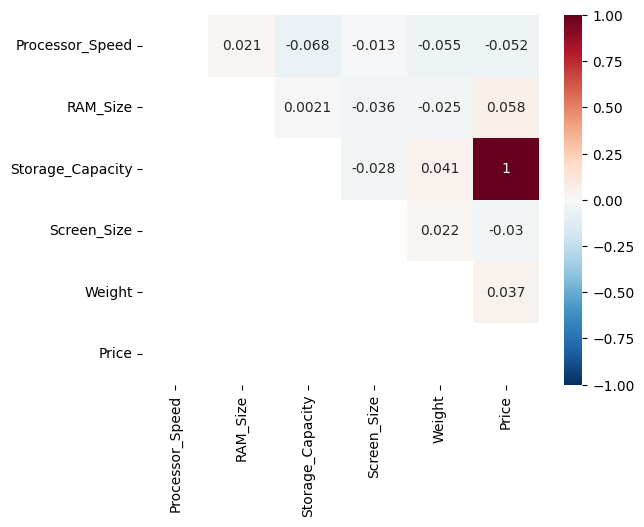

In [9]:
cor_mat = df_no_brand.corr()
print(cor_mat)
upper_tri = cor_mat.where(np.triu(np.ones(cor_mat.shape),k=1).astype(np.bool_))
print(upper_tri)
sns.heatmap(upper_tri, cmap='RdBu_r', annot=True, vmin=-1, vmax=1)
plt.show()

drop high correlation (ignore)

In [10]:
print(upper_tri)
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
#df.drop(to_drop, axis=1, inplace=True)
print("To drop: ", to_drop)

                  Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size  \
Processor_Speed               NaN  0.021391         -0.067576    -0.013425   
RAM_Size                      NaN       NaN          0.002111    -0.036002   
Storage_Capacity              NaN       NaN               NaN    -0.027560   
Screen_Size                   NaN       NaN               NaN          NaN   
Weight                        NaN       NaN               NaN          NaN   
Price                         NaN       NaN               NaN          NaN   

                    Weight     Price  
Processor_Speed  -0.054603 -0.052451  
RAM_Size         -0.025382  0.058234  
Storage_Capacity  0.041335  0.997905  
Screen_Size       0.021995 -0.030380  
Weight                 NaN  0.037298  
Price                  NaN       NaN  
To drop:  ['Price']


['Processor_Speed' 'RAM_Size' 'Storage_Capacity' 'Screen_Size' 'Weight']


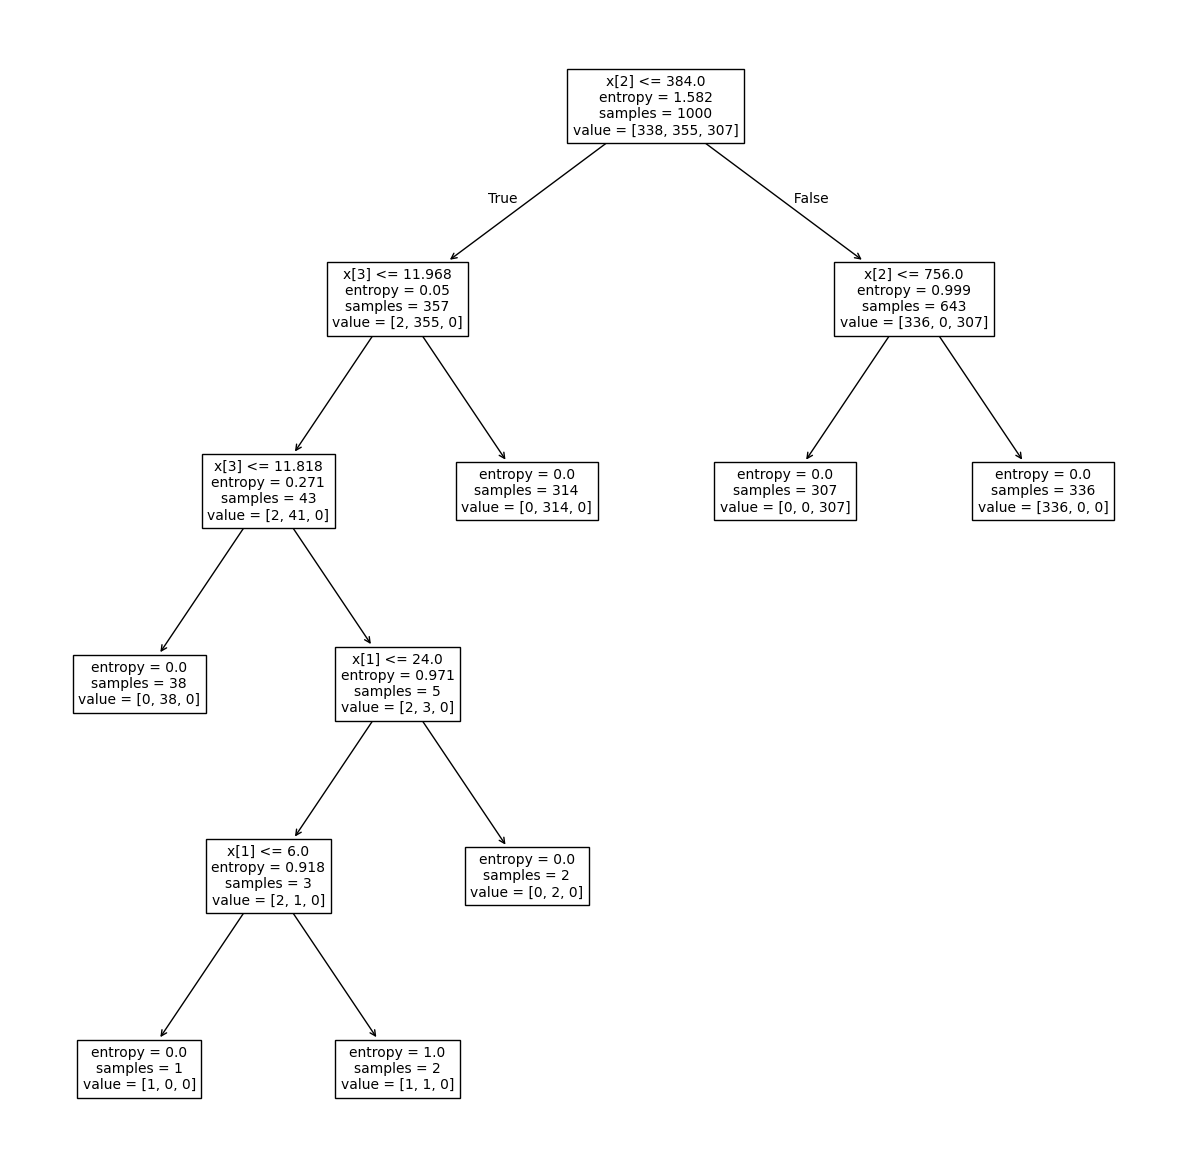

In [11]:
train_labels = df["Price"].apply(lambda x:  'Low' if x < 15000 else ('Medium' if x < 25000 else 'Hight'))
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
df_for_tree = df_no_brand.drop(['Price'], axis=1)
clf = clf.fit(df_for_tree, train_labels)
plt.figure(figsize=(15,15))
tree.plot_tree(clf, fontsize=10)
print(df_for_tree.columns.values)
plt.show()